https://www.bing.com/videos/search?q=time+series+analysis+sklearn&ru=%2fvideos%2fsearch%3fq%3dtime%2bseries%2banalysis%2bsklearn%26FORM%3dHDRSC3&view=detail&mid=A01EF0BA03EFD4D905E9A01EF0BA03EFD4D905E9&rvsmid=CECFAC97A0C13BED267ECECFAC97A0C13BED267E&FORM=VDQVAP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This will be a dataframe
# mbs = pd.read_excel("MapleBSCupHist.xlsx", index_col=[0], parse_dates=[0])

# To imediately change it into a series, use SQUEEZE function
mbs = pd.read_excel("MapleBSCupHist.xlsx", index_col=[0], parse_dates=[0], squeeze=True)

In [3]:
mbs.head()
type(mbs)

pandas.core.series.Series

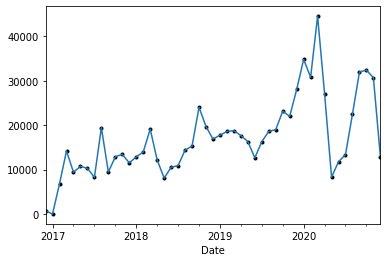

In [5]:
mbs.plot(style = 'k.')
mbs.plot()

In [6]:
mbs.describe()

count       49.000000
mean     17048.591837
std       8763.888138
min         20.000000
25%      11509.000000
50%      15304.000000
75%      19706.000000
max      44551.000000
Name: Quantity, dtype: float64

In [7]:
mbs_ma = mbs.rolling(window=10).mean()

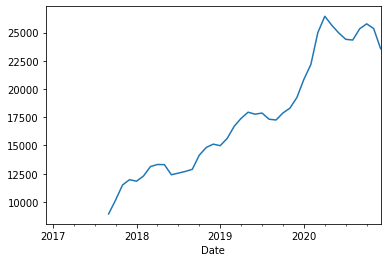

In [8]:
mbs_ma.plot()

### BASELINE model - best predictor is the last value.  Use SHIFT method

In [9]:
mbs_baseline_model = pd.concat([mbs, mbs.shift(1)], axis=1)

In [10]:
mbs_baseline_model

,Quantity,Quantity
Date,,
2016-12-01,686,NaN
2017-01-01,20,686.0
2017-02-01,6830,20.0
2017-03-01,14213,6830.0
2017-04-01,9400,14213.0
2017-05-01,10740,9400.0
2017-06-01,10290,10740.0
2017-07-01,8260,10290.0
2017-08-01,19456,8260.0


In [13]:
# To rename columns
mbs_baseline_model.columns = ("Actual", "Forecast")
mbs_baseline_model

,Actual,Forecast
Date,,
2016-12-01,686,NaN
2017-01-01,20,686.0
2017-02-01,6830,20.0
2017-03-01,14213,6830.0
2017-04-01,9400,14213.0
2017-05-01,10740,9400.0
2017-06-01,10290,10740.0
2017-07-01,8260,10290.0
2017-08-01,19456,8260.0


In [16]:
# We have to drop any NAN. Make sure you have inplace=True, otherwise it will come back
mbs_baseline_model.dropna(inplace=True)

In [17]:
mbs_baseline_model

,Actual,Forecast
Date,,
2017-01-01,20,686.0
2017-02-01,6830,20.0
2017-03-01,14213,6830.0
2017-04-01,9400,14213.0
2017-05-01,10740,9400.0
2017-06-01,10290,10740.0
2017-07-01,8260,10290.0
2017-08-01,19456,8260.0
2017-09-01,9462,19456.0


In [19]:
# Calculate error
from sklearn.metrics import mean_squared_error
import numpy as np

In [21]:
mbs_baseline_error = mean_squared_error(mbs_baseline_model.Actual, mbs_baseline_model.Forecast)
mbs_baseline_error

43636885.604166664

In [22]:
np.sqrt(mbs_baseline_error)

6605.822099040109

### ARIMA model

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

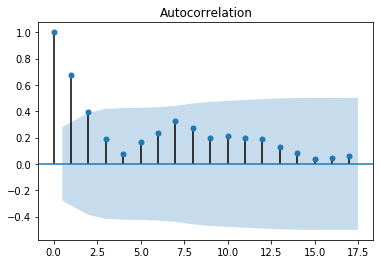

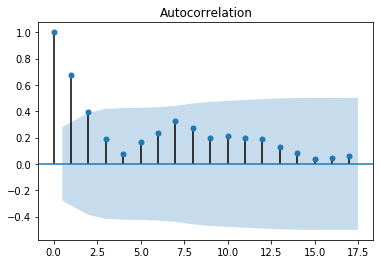

In [29]:
# plot_acf is used to identify parameter Q
plot_acf(mbs)

# So, q is 2

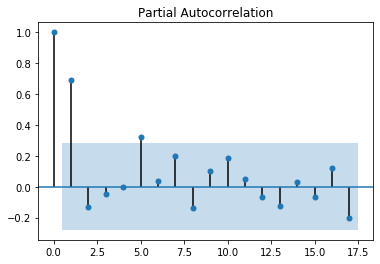

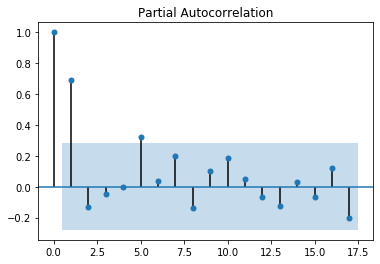

In [31]:
# plot_pacf is used to identify parameter P
plot_pacf(mbs)

#So, p = 2

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
# create train and test data
train_mbs = mbs[0:40]
test_mbs = mbs[40:49]
test_mbs.size

9

In [45]:
mbs_arima_model = ARIMA(train_mbs, order=(3,1,2))

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
# fit the model
mbs_arima_fit = mbs_arima_model.fit()

In [47]:
mbs_arima_fit.aic

774.0700534328645

In [48]:
# Forecast cups using ARIMA model (2,1,2).  Give us the next 9 months.  Then you can compare to the TEST set
cups_forecast = mbs_arima_fit.forecast(steps = 9)[0]

In [49]:
cups_forecast

array([41033.6680273 , 43476.28010395, 45204.78073338, 44079.09310709,
       48125.96114785, 46204.92824561, 49417.37986798, 49689.22533548,
       49964.7265581 ])

In [50]:
test_mbs

Date
2020-04-01    27123
2020-05-01     8310
2020-06-01    11779
2020-07-01    13380
2020-08-01    22498
2020-09-01    32002
2020-10-01    32410
2020-11-01    30688
2020-12-01    12943
Name: Quantity, dtype: int64

In [51]:
np.sqrt(mean_squared_error(test_mbs, cups_forecast))

26602.65736822683

## The baseline model is better than this ARIMA model!

In [52]:
# Let's automated this a little by giving some parameters so that you have don't have to do it manually

p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train, test = mbs[0:40] , mbs[40:49]
            predictions = list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train, order)
                    model_fit=model.fit(dis=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('ARIMA%s MSE = %.2f' %(order,error))
                except:
                    continue

ARIMA(0, 0, 1) RMSE = 251478417.92
ARIMA(0, 0, 2) RMSE = 157104503.80
ARIMA(0, 0, 4) RMSE = 284252159.53
ARIMA(0, 1, 1) RMSE = 489647104.97
ARIMA(0, 1, 2) RMSE = 481031475.33
ARIMA(0, 1, 3) RMSE = 467304332.43
ARIMA(0, 1, 4) RMSE = 365102748.20
ARIMA(0, 2, 1) RMSE = 718145710.19
ARIMA(1, 0, 0) RMSE = 548451395.84
ARIMA(1, 0, 1) RMSE = 450817244.36
ARIMA(1, 1, 0) RMSE = 468965675.35
ARIMA(1, 1, 1) RMSE = 468163199.19
ARIMA(1, 1, 2) RMSE = 477643539.67
ARIMA(1, 2, 0) RMSE = 732450491.75
ARIMA(1, 2, 1) RMSE = 511157877.95
ARIMA(1, 2, 2) RMSE = 511488847.25
ARIMA(2, 0, 0) RMSE = 419572254.93
ARIMA(2, 0, 1) RMSE = 419325198.22
ARIMA(2, 1, 0) RMSE = 471917511.01
ARIMA(2, 1, 1) RMSE = 502706540.60
ARIMA(2, 1, 2) RMSE = 690929795.88
ARIMA(2, 2, 0) RMSE = 726714019.23
ARIMA(2, 2, 1) RMSE = 595979162.58
ARIMA(2, 2, 3) RMSE = 541348755.85
ARIMA(3, 0, 0) RMSE = 418960561.69
ARIMA(3, 1, 0) RMSE = 516022547.62
ARIMA(3, 1, 1) RMSE = 512820900.51
ARIMA(3, 1, 2) RMSE = 475614914.98
ARIMA(3, 2, 0) RMSE 

### Square root of the smallest value of 157104503 is 12534.  The BASELINE MODEL is still better!

### DATA TRANSFORMATION - see how it compares when data is NORMALIZED!!  See jupyter notebook CupDataTransformationTechniques